In [1]:
%pylab inline
import pandas as pd
from sys import platform
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from geopy.geocoders import Nominatim
import folium

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
### Load race and mereged DataFrames

weather = pd.read_csv(path + 'data/weather.csv')
merged = pd.read_csv(path + 'data/merged.csv')

In [45]:
warm = weather.warm.value_counts()
cold = weather.cold.value_counts()
dry = weather.dry.value_counts()
wet = weather.wet.value_counts()
cloudy = weather.cloudy.value_counts()

total_count = weather.shape[0]

In [59]:
warm

False    20
True     19
Name: warm, dtype: int64

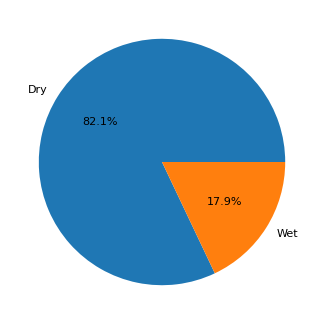

In [57]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

labels = 'Dry', 'Wet'
sizes = wet.values

axs.set_title('Ratio of Dry to Wet races')
axs.set_xlabel('')
axs.set_ylabel('')
axs.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

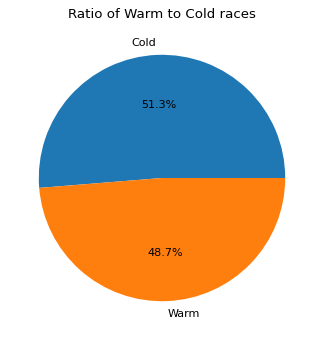

In [60]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

labels = 'Cold', 'Warm'
sizes = warm.values

axs.set_title('Ratio of Warm to Cold races')
axs.set_xlabel('')
axs.set_ylabel('')
axs.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()